# Homework 5

## Gianni Spiga

### For STA 209, Fall 2023

- I discussed approaches and methodology to these problems with 

## 1 Programming: Basics
Consider the function $f(x) = \|Ax − b\|^2_2$. We will use python to implement zeroth-order, first-order and second-order algorithm to optimize $f$ which are given by
$$
\text{Zeroth-order:} \ x_t +1 = x_t − \frac{η f (x_t + δe) − f (x_t)}{δ} e \\
\text{First-order:} \ x_t +1 = x_t − η \nabla f(x_t) \\ 
\text{Second-order:} \ \ x_t+1 = x_t − η(∇^2 f(x_t))^{−1}∇f (x_t) \\
$$

- (1) In 1-dimension case, suppose that $f(x) = (ax − b)^2$ with $a = 2$ and $b = 10$. Set the number of total iteration to be $T = 1000$ and $η = 0.02$. Complete the missing parts
in **ItrOptQuadObj.py** to generate the plots of $|x_t − x^∗|$ and $|f (x_t) − f (x^∗)|$ v.s. $t$ using
zeroth-order, first-order and second-order algorithm. (In zeroth-order algorithm, we use
$δ = 0.1$)

In [1]:
import os
import sys
import time
import math
import numpy
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import autograd.numpy as np
from numpy.linalg.linalg import matmul
from numpy.core.numeric import identity
import math
from numpy.core.numeric import identity

Text(0, 0.5, 'Error $|f(x_t)-f(x^{*})|$')

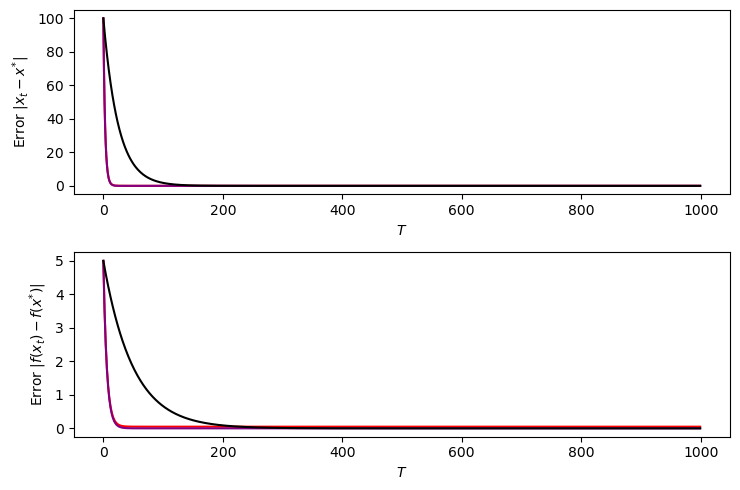

In [2]:
## Programming in 1-dimension
## f(x)=(ax-b)^2
## Gradient: 2a(ax-b)
## Hessian: 2a^2
def target_fun(a,b,x):
  return (a*x-b)**2
def zeroth_oracle(delta,x,a,b):
  return (target_fun(a,b,x+delta)-target_fun(a,b,x))/delta
def grad(a,b,x):
  return 2*a*(a*x-b)
def hes(a,b,x):
  return 2*a**2

## parameters a=2 b=10
a=2
b=10
x_star = b/a
T_tot = 1000
eta_rate = 0.02

def Zeroth_order_d1(T,eta):
## Initial point: x_0=0
  delta_zero=0.1
  x_prev = 0
  x_new = 0
  fun_error_list = []
  x_error_list = []
  for i in range(T):
    x_prev = x_new
    fun_error_list.append(abs(target_fun(a,b,x_prev)-target_fun(a,b,x_star)))
    x_error_list.append(abs(x_prev-x_star))
    ## update rule here
    x_new = x_prev  - eta_rate * zeroth_oracle(delta_zero, x_prev, a, b)
  return fun_error_list, x_error_list;

def Grad_descent_d1(T,eta):
## Initial point: x_0=0
  x_prev = 0
  x_new = 0
  fun_error_list = []
  x_error_list = []
  for i in range(T):
    x_prev = x_new
    fun_error_list.append(abs(target_fun(a,b,x_prev)-target_fun(a,b,x_star)))
    x_error_list.append(abs(x_prev-x_star))
    ## update rule here
    x_new = x_prev - eta_rate * grad(a,b,x_prev)
  return fun_error_list, x_error_list;

def Second_order_d1(T,eta):
## Initial point: x_0=0
  x_prev = 0
  x_new = 0
  fun_error_list = []
  x_error_list = []
  for i in range(T):
    x_prev = x_new
    fun_error_list.append(abs(target_fun(a,b,x_prev)-target_fun(a,b,x_star)))
    x_error_list.append(abs(x_prev-x_star))
    ## update rule here
    x_new = x_prev - eta_rate * (1/hes(a, b, x_prev)) * grad(a, b, x_prev)
  return fun_error_list, x_error_list;

x_traj_zero, fun_traj_zero = Zeroth_order_d1(T_tot,eta_rate)
x_traj_first, fun_traj_first = Grad_descent_d1(T_tot,eta_rate)
x_traj_second, fun_traj_second = Second_order_d1(T_tot,eta_rate)

plt.rcParams["figure.figsize"] = [7.50, 5]
plt.rcParams["figure.autolayout"] = True
Trange = np.arange(T_tot)
plt.figure(1)
plt.subplot(211)
plt.plot(Trange, x_traj_zero, color = 'red')
plt.xlabel(r'$T$')
plt.ylabel(r'Error $|x_t-x^{*}|$')
plt.subplot(212)
plt.plot(Trange, fun_traj_zero, color = 'red')
plt.xlabel(r'$T$')
plt.ylabel(r'Error $|f(x_t)-f(x^{*})|$')

plt.rcParams["figure.figsize"] = [7.50, 5]
plt.rcParams["figure.autolayout"] = True
Trange = np.arange(T_tot)
plt.figure(1)
plt.subplot(211)
plt.plot(Trange, x_traj_first, color = 'purple')
plt.xlabel(r'$T$')
plt.ylabel(r'Error $|x_t-x^{*}|$')
plt.subplot(212)
plt.plot(Trange, fun_traj_first, color = 'purple')
plt.xlabel(r'$T$')
plt.ylabel(r'Error $|f(x_t)-f(x^{*})|$')

plt.rcParams["figure.figsize"] = [7.50, 5]
plt.rcParams["figure.autolayout"] = True
Trange = np.arange(T_tot)
plt.figure(1)
plt.subplot(211)
plt.plot(Trange, x_traj_second, color = 'black')
plt.xlabel(r'$T$')
plt.ylabel(r'Error $|x_t-x^{*}|$')
plt.subplot(212)
plt.plot(Trange, fun_traj_second, color = 'black')
plt.xlabel(r'$T$')
plt.ylabel(r'Error $|f(x_t)-f(x^{*})|$')



- (2) In d=2-dimension case, suppose that $f(x) = \|Ax − b\|^2_2$ with
$$
\lambda = \begin{bmatrix} 2 & 4 \\ 
1 & 1 \\
10 & 2 \\
\end{bmatrix},
b = \begin{bmatrix} 100 \\ 200 \\ 300 \\ \end{bmatrix}
$$

Set the number of total iteration to be $T = 1000$ and $η = 0.005$. Complete the missing
parts in **ItrOptQuadObj.py** to generate the plots of $|x_t − x^∗|$ and $|f (x_t) − f (x^∗)|$ v.s. $t$
using zeroth-order, first-order and second-order algorithm. (In zeroth-order algorithm, we
use $δ = 0.1$ and $e = [1, 1]^T$)

Text(0, 0.5, 'Error $|f(x_t)-f(x^{*})|$')

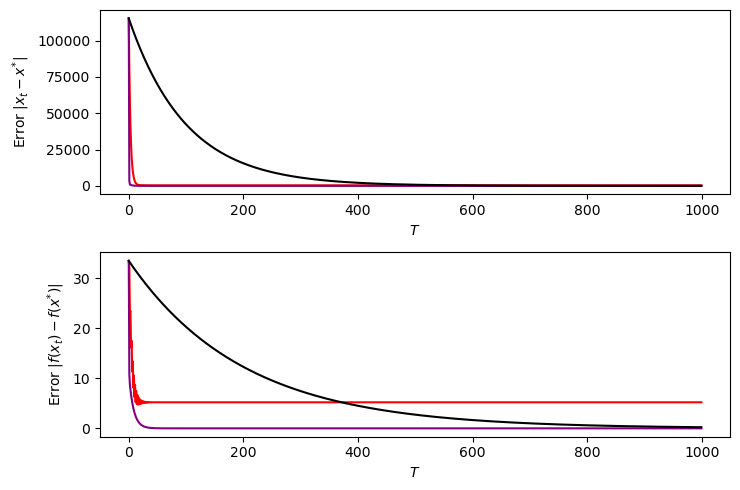

In [3]:
## Programming in d-dimension
## f(x)=(Ax-b)^T(Ax-b)
## Gradient: 2A^T(Ax-b)
## Hessian: 2A^TA
def target_fun_p(A,b,x):
  return (A@x-b).T@(A@x-b)
def zeroth_oracle_p(delta,vec,x,A,b):
  return ((target_fun_p(A,b,x+delta*vec)-target_fun_p(A,b,x))/delta)*vec
def grad_p(A,b,x):
  return 2*A.T@(A@x-b)
def hes_p(A,b,x):
  return 2*A.T@A

## parameters
A=np.array([[2,4],[1,1],[10,2]])
b=np.array([[100],[200],[300]])
x_star = np.linalg.inv(A.T@A)@A.T@b
T_tot = 1000
eta_rate = 0.005

def Zeroth_order_dl_p(T,eta):
## Initial point: x_0=0
  delta_zero=0.1
  x_prev = np.array([[0],[0]])
  x_new = np.array([[0],[0]])
  fun_error_list = []
  x_error_list = []
  evec = np.array([[1],[1]])
  for i in range(T):
    x_prev = x_new
    fun_error_list.append(np.linalg.norm(target_fun_p(A,b,x_prev)-target_fun_p(A,b,x_star)))
    x_error_list.append(np.linalg.norm(x_prev-x_star))
    ## update rule here
    x_new = x_prev - eta_rate*zeroth_oracle_p(delta_zero, evec, x_prev, A, b)
  return fun_error_list, x_error_list;

def Grad_descent_d1_p(T,eta):
## Initial point: x_0=0
  x_prev = np.array([[0],[0]])
  x_new = np.array([[0],[0]])
  fun_error_list = []
  x_error_list = []
  for i in range(T):
    x_prev = x_new
    fun_error_list.append(np.linalg.norm(target_fun_p(A,b,x_prev)-target_fun_p(A,b,x_star)))
    x_error_list.append(np.linalg.norm(x_prev-x_star))
    ## update rule here
    x_new = x_prev - eta_rate * grad_p(A,b,x_prev)
  return fun_error_list, x_error_list;

def Second_order_d1_p(T,eta):
## Initial point: x_0=0
  x_prev = np.array([[0],[0]])
  x_new = np.array([[0],[0]])
  fun_error_list = []
  x_error_list = []
  for i in range(T):
    x_prev = x_new
    fun_error_list.append(np.linalg.norm(target_fun_p(A,b,x_prev)-target_fun_p(A,b,x_star)))
    x_error_list.append(np.linalg.norm(x_prev-x_star))
    ## update rule here
    x_new = x_prev - eta_rate * np.linalg.inv(hes_p(A, b, x_prev)) @ grad_p(A, b, x_prev)
  return fun_error_list, x_error_list;

x_traj_zero_p, fun_traj_zero_p = Zeroth_order_dl_p(T_tot,eta_rate)
x_traj_first_p, fun_traj_first_p = Grad_descent_d1_p(T_tot,eta_rate)
x_traj_second_p, fun_traj_second_p = Second_order_d1_p(T_tot,eta_rate)

plt.rcParams["figure.figsize"] = [7.50, 5]
plt.rcParams["figure.autolayout"] = True
Trange = np.arange(T_tot)
plt.figure(1)
plt.subplot(211)
plt.plot(Trange, x_traj_zero_p, color = 'red')
plt.xlabel(r'$T$')
plt.ylabel(r'Error $|x_t-x^{*}|$')
plt.subplot(212)
plt.plot(Trange, fun_traj_zero_p, color = 'red')
plt.xlabel(r'$T$')
plt.ylabel(r'Error $|f(x_t)-f(x^{*})|$')

plt.rcParams["figure.figsize"] = [7.50, 5]
plt.rcParams["figure.autolayout"] = True
Trange = np.arange(T_tot)
plt.figure(1)
plt.subplot(211)
plt.plot(Trange, x_traj_first_p, color = 'purple')
plt.xlabel(r'$T$')
plt.ylabel(r'Error $|x_t-x^{*}|$')
plt.subplot(212)
plt.plot(Trange, fun_traj_first_p, color = 'purple')
plt.xlabel(r'$T$')
plt.ylabel(r'Error $|f(x_t)-f(x^{*})|$')

plt.rcParams["figure.figsize"] = [7.50, 5]
plt.rcParams["figure.autolayout"] = True
Trange = np.arange(T_tot)
plt.figure(1)
plt.subplot(211)
plt.plot(Trange, x_traj_second_p, color = 'black')
plt.xlabel(r'$T$')
plt.ylabel(r'Error $|x_t-x^{*}|$')
plt.subplot(212)
plt.plot(Trange, fun_traj_second_p, color = 'black')
plt.xlabel(r'$T$')
plt.ylabel(r'Error $|f(x_t)-f(x^{*})|$')

## 2 Gradient decent with predetermined step-size
Here, we consider gradient descent with predetermined step sizes $α_k$ i.e., the value of $α_k$ is set in advance and held constant through all iterations of gradient descent. (In the lectures, we also discussed setting $α_k$ using a linesearch method at every iteration, by using current values of the iterate $x_k$ and the descent direction $d_k$.)

Let $f$ be a $m$-strongly convex and $L$-smooth twice-continuously differentiable function $f(x)$,
so the Hessian is bounded by $mI \lesssim \nabla^2 f(x) \lesssim LI$. Write $κ = L/m$. Call the value of the fixed
step size $α_k = α$.
- (a) Show that, with some particular well-chosen step size $α∗$, which only depends on $m$ and/or $L$, gradient descent achieves $f(x_k) − f ∗ \leq \epsilon$ after
$$
T = \frac{1}{\log ( \frac{κ}{κ−1})} \frac{\log f(x^0) − f^∗}{\epsilon}
$$
iterations. What is this $α^∗$ ? 

By L-smoothness:
$$
f(x_{k+1}) \leq f(x_k) - \frac{1}{2L}\|\nabla f(x_k) \|^2
$$
and by m-strong convexity:
$$
\|\nabla f(x_k) \|^2 \geq 2m(f(x_k) - f(x^*))
$$
When combined, we have:
$$
\begin{align*}
f(x_{k+1}) &\leq f(x_k) - \frac{1}{2L} 2m(f(x_k) - f(x^*)) \\
f(x_{k+1}) &\leq f(x_k) - \frac{m}{L} (f(x_k) - f(x^*)) \\
f(x_{k+1}) - f(x^*) &\leq f(x_k) - f(x^*) - \frac{m}{L} (f(x_k) - f(x^*)) \\
f(x_{k+1}) - f(x^*) &\leq  (1 - \frac{m}{L}) (f(x_k) - f(x^*)) \\
\end{align*}
$$

On the $k$-th iteration:
$$
\begin{align*}
f(x_{k+1}) - f(x^*) &\leq  (1 - \frac{m}{L})^k (f(x_0) - f(x^*)) \\
(1 - \frac{m}{L})^k (f(x_0) - f(x^*)) &\leq \epsilon \\
(1 - \frac{m}{L})^k  &\leq \frac{\epsilon}{(f(x_0) - f(x^*))} \\
k \log (1 - \frac{m}{L})  &\leq \log \frac{\epsilon}{(f(x_0) - f(x^*))} \\
k  &\geq \log \frac{\frac{\epsilon}{(f(x_0) - f(x^*))}}{\log (1 - \frac{m}{L})} \\
k  &\geq \log \frac{\frac{(f(x_0) - f(x^*))}{\epsilon}}{- \log (1 - \frac{m}{L})} \\
- \log (1 - \frac{m}{L}) = \log (\frac{1}{1 - \frac{m}{L}}) &= \log (\frac{L}{L - m}) = \log (\frac{\kappa}{\kappa - 1}) \\
T  &\geq \frac{1}{\log ( \frac{κ}{κ−1})} \frac{\log f(x^0) − f^∗}{\epsilon}
\end{align*}
$$

Thus we have the iteration complexity achieved when $\alpha^* = \frac{1}{L}$.



Now, we look at the consequences of choosing the ”wrong” step size.

- (b) (Small step size) Set the step size as $α = \frac{t}{L}$ for some $0 < t < 2$. Prove that gradient
descent will still converge. How many iterations are necessary to find an $\epsilon$-suboptimal
solution.

By $L$-smoothness:

$$
\begin{align*}
f(x_{k+1}) &\leq f(x_k) - \alpha \| \nabla f(x_k) \|^2 + \frac{L\alpha^2}{2} \| \nabla f(x_k) \|^2 \\ 
&\leq f(x_k) - \frac{t}{L} \| \nabla f(x_k) \|^2 + \frac{t^2}{2L} \| \nabla f(x_k) \|^2 \\
&\leq f(x_k) - \big(\frac{t}{L} - \frac{t^2}{2L}\big) \| \nabla f(x_k) \|^2 \\
\end{align*}
$$

Combining with this result with strong convexity:
$$
\begin{align*}
f(x_{k}) - f(x^*) &\leq (1 - \big(\frac{t}{L} - \frac{t^2}{2L}\big)2m)^k (f(x_0) - f(x^*)) \\
&\leq (1 - (\frac{2mt}{L} - \frac{mt^2}{L}))^k (f(x_0) - f(x^*)) \\
&\leq (1 - \frac{tm(2 - t)}{L})^k (f(x_0) - f(x^*)) \\
\text{We need:}& \\
(1 - \frac{tm(2 - t)}{L})^k (f(x_0) - f(x^*)) &\leq \epsilon \\
(1 - \frac{tm(2 - t)}{L})^k &\leq \frac{\epsilon}{(f(x_0) - f(x^*))} \\
k \log(1 - \frac{tm(2 - t)}{L}) &\leq \log(\frac{\epsilon}{(f(x_0) - f(x^*))}) \\
T &\geq \frac{\log(\frac{\epsilon}{(f(x_0) - f(x^*))})}{\log(1 - \frac{tm(2 - t)}{L})} \\
\end{align*}
$$

- (c) (Large step size) If $α$ is too large, gradient descent may not converge. Provide an example
of a m-strongly convex and L-smooth function $f : \mathbb{R} → \mathbb{R}$ such that gradient descent with
step size $2/L$ does not converge. ($L$ and $m$ are your choice.) Explicitly write down the
function, an initial point from which gradient descent does not converge, and all of the
iterates of gradient descent.

A simple example is $f(x) = \frac{L}{2}x^2$, which is both $L$-smooth and $L$-strongly convex. We have the updating step:
$$
x_{k+1} = x_k - 2x_k = -x_k
$$
If we start at $x_0 = 1$, then every odd index $k$ will have a corresponding step value of $-1$ and every even index with a $1$. Due to this oscillation, we will never have convergence to our minimum. 

**Gradient Descent with unknown smoothness parameter**

Let $f$ be an $m$-strongly convex and $L$-smooth function. You showed above that doing
gradient descent with a fixed step size (depending on L ) may or may not converge to an
$\epsilon$-suboptimal solution. What can we do if we want to optimize $f$ , but don’t know $L$ or $m$?
Let’s try doing gradient descent with a decreasing step size schedule, i.e., use $α_k = \frac{t_k}{L}$ where
$t_k$ depends on $k$.
- (d) Show that
$$
f(x^T) - f^* \leq \big(f(x^0) - f^*) \prod_{k=1}^T \bigg(1 - \frac{2t_k - (t_k)^2}{\kappa}\bigg)
$$

By $L$-smoothness:
$$
\begin{align*}
f(x_{k+1}) &\leq f(x_k) - \alpha_k \| \nabla f(x_k) \|^2 + \frac{L \alpha^2_k}{2} \|f(x_k) \|^2 \\ 
&\leq - \frac{t_k}{L} \| \nabla f(x_k) \|^2 + \frac{t_k^2}{2L} \| \nabla f(x_k) \|^2
&\leq - (\frac{t_k}{L} - \frac{t_k^2}{2L}) \| \nabla f(x_k) \|^2 \\
\end{align*}
$$ 
With strong-convexity:
$$
\begin{align*}
f(x_{k+1}) - f(x^*) &\leq \big(1 - \frac{2m(\frac{t_k}{L} - \frac{t_k^2}{2L})}{m}) f(x_k) - f(x^*) \\
&\leq \big(1 - \frac{(2t_k - t_k^2)}{\kappa}) f(x_k) - f(x^*) \\ 
f(x^T) - f(*) &\leq f(x_0) - f^* \prod_{k=1}^T \big(1 - \frac{(2t_k - t_k^2)}{\kappa})
\end{align*}
$$

- (e) Since we don’t know $L$, we obviously can’t choose the $t_k$’s directly. Is there a way
to schedule step sizes $α_k$, before seeing evaluations or gradients of $f$, that guarantees
convergence?

Yes, we could solve for efficients ways to modify the scale of step size based on which iteration we are currently on by using the value of $k$ to our advantage. 



## Programming : Logistic Regression

Here we are going to play with a logistic regression example. There are two examples in **LogReg.py**: a 1-D toy example and a larger data set. For the toy example, use gradient descent with:
- (a) Backtracking line search.
- (b) Constant stepsize 1/L . If L is not clear for the toy example, use a large L that serve as
an upper bound.

On one set of axes, plot the suboptimality of your iterates as a function of the iteration
counter. For the larger example, the data is constained in the file logisticdat.csv. The code
to read in the data file is provided in **LogReg.py**. You are encouraged to try methods of your
choice and to report any behavior that you observed.

In [19]:
import numpy as np
import algorithms as alg
import functions as functions
import plotly.express as px
import plotly.graph_objects as go

###############################################################################################toy example
###############################################################################################

############## 1 dimensional data toy example
d=1
y=np.matrix('1.0;1.0;1.0;1.0;-1.0;-1.0;-1.0;-1.0')
X=np.matrix('8.0;7.0;6.0;5.0;4.0;3.0;2.0;1.0')



###########Form the oracle function of the objective
def func(w, order):
    return functions.logistic(y, X, w, order)


#############Intialized at 0
initial_w = np.asmatrix(np.zeros( shape=(d,1) ) )
err = 1e-4
maximum_iterations = 65536


# TODO：Run gradient descent with backtracking line search and with fixed step sizes as directed in the homework

#def backtracking_line_search(x, grad, alpha=0.3, beta=0.8):
#    t = 1.0
#    while func(x - t * grad, order = 0) > func(x - t * grad, order = 0) - alpha * t * grad**2:
#        t *= beta
#    return t

#def gradient_descent(initial_x, max_iter, epsilon = 1e-5):
#    x = initial_x
#    grad = 1 # placeholder
#    while grad > epsilon:
#        grad = func(x, order=1)
#        alpha = backtracking_line_search(x, grad=grad)
#        x = x - alpha * grad
#    return x


def backtracking_line_search(x, grad, zeroth, alpha=0.3, beta=0.8):
    t = 1.0
    while func(x - t * grad, order=0) > zeroth - alpha * t * np.linalg.norm(grad)**2:
        t *= beta
    return t

def gradient_descent_const(initial_x, max_iter, epsilon=1e-5):
    x = initial_x
    cost_values = []

    # Constant step size, choosing large enough L
    alpha = 1/100

    for i in range(max_iter):
        zeroth, grad = func(x, order=1)
        cost_values.append(zeroth)

        if np.linalg.norm(grad) < epsilon:
            break
        #alpha = backtracking_line_search(x, grad, zeroth)
        x = x - alpha * grad
        if np.linalg.norm(grad * alpha) < err:
            break
    return x, i, cost_values


def gradient_descent_btls(initial_x, max_iter, epsilon=1e-5):
    x = initial_x
    cost_values = []

    for i in range(max_iter):
        zeroth, grad = func(x, order=1)
        cost_values.append(zeroth)

        if np.linalg.norm(grad) < epsilon:
            break
        alpha = backtracking_line_search(x, grad, zeroth)
        x = x - alpha * grad
        if np.linalg.norm(grad * alpha) < err:
            break
        
    return x, i, cost_values


# Constant step size
optimal_x_const, iter_count_const, cost_values_const = gradient_descent_const(initial_w, maximum_iterations)

iter_count_list = np.arange(0,iter_count_const + 1)

optimal_cost = min(cost_values_const)
suboptimality_const = [cost - optimal_cost for cost in cost_values_const]

# Backtracking 
optimal_x, iter_count, cost_values = gradient_descent_btls(initial_w, maximum_iterations)

iter_count_list_btr = np.arange(0,iter_count + 1)

optimal_cost = min(cost_values)
suboptimality_btr = [cost - optimal_cost for cost in cost_values]

fig = px.line(x = iter_count_list, y = suboptimality_const, title="Suboptimality Plot with Toy Data Set", labels = {"x":"Iterations", "y":"Suboptimality"})
fig.add_scatter(x = iter_count_list_btr, y = suboptimality_btr, mode = 'lines', name = "BackTracking")
fig.show()

#####################################################################################################################
######################################################################################################################




################################################################################A larger Example
###################################################################################################



# read the data from csv file
data = np.genfromtxt('logisticdat.csv', delimiter=',')

# extract the labels y and features X from dataset (y is in the first column)
y = np.asmatrix(data[:, 0]).T
X = data[:,1:data.shape[1]]
d = X.shape[1]

#Form the oracle function of the objective
def func(w, order):
    return functions.logistic(y, X, w, order)

# initialization from 0
initial_w = np.asmatrix( np.zeros( shape=(d,1) ) )
epsilon =0.001
err = 1e-5
maximum_iterations = 65536

# TODO: Try backtracking linesearch
#optimal_x, iter_count, cost_values = gradient_descent(initial_w, maximum_iterations)

# Constant step size
optimal_x_const, iter_count_const, cost_values_const = gradient_descent_const(initial_w, maximum_iterations)

iter_count_list = np.arange(0,iter_count_const + 1)

optimal_cost = min(cost_values_const)
suboptimality_const = [cost - optimal_cost for cost in cost_values_const]

# Backtracking 
optimal_x, iter_count, cost_values = gradient_descent_btls(initial_w, maximum_iterations)

iter_count_list_btr = np.arange(0,iter_count + 1)

optimal_cost = min(cost_values)
suboptimality_btr = [cost - optimal_cost for cost in cost_values]

fig = px.line(x = iter_count_list, y = suboptimality_const, title="Suboptimality Plot with Real Data Set", labels = {"x":"Iterations", "y":"Suboptimality"})
fig.add_scatter(x = iter_count_list_btr, y = suboptimality_btr, mode = 'lines', name = "BackTracking")
fig.update_xaxes(range=[0, 10000])
fig.show()


#############################################################################################
#############################################################################################


From the plots, we can see the constant step sized gradient descent (shown in blue) has a slower convergence in suboptimality than the baccktracking line search (shown in red). This should make sense, as we are scheduling our value of $\alpha$ to adjust to each iteration. 

## 4 Gradient descent without strong convexity
Let $f$ be a convex function that is $L$-smooth, but not strongly convex. Instead, assume that the $f(x_0)$ - sublevel set of $f$ is bounded, i.e.
$$
∀x ∈ \mathbb{R}^n \ \text{such that} \ f(x) ≤ f (x^0) , \ \|x − x_0 \| ≤ R_0 /2
$$
As long as the function values $f(x^k)$ decrease as the algorithm proceeds, our iterates $x^k$ will never be farther than $\mathbb{R}_0$ from $x^∗$. [Show that using triangle inequality]. Remark 4.1. We will start with showing the statement that the iterates xk will never be farther than $\mathbb{R}_0$ from $x^∗$. Let $x_k ∈ \mathbb{R}^n$ be one iterate such that $f(x^k) < f(x^0)$. Note that as the minimal point, $x^∗$ should also satisfy $f (x^∗) < f (x^{(0)})$. Therefore, it follows from triangle
inequality that 
$$
\| x^k − x^∗ \|^2 ≤ \|x^k − x^0 \|_2 + \|x^* - x^0\|_2 \leq \frac{R_0}{2} + \frac{R_0}{2} = R_0
$$

(a) Show that by optimizing
$$
f_λ(x) = f(x) + \frac{λ}{2} \|x − x^0 \|^2
$$
which is $λ + L$-smooth and $λ$-strongly convex and carefully choosing the value of λ, we can
find an $\epsilon$-suboptimal point after poly (1/$\epsilon$) iterations. What should you set $λ$ to? What
is the resulting runtime?



$f(x_0)$ is a sublevel set of $f$, which is bounded $\forall x \in \mathbb{R}^n$ such that $f(x) \leq f(x_0)$, $\exists \  \|x - x_0 \| \leq \frac{\R_0}{2}$

We can show:
$$
\begin{align*}
f(x) - f^* &= f(x) - \frac{\lambda}{2} \|x-x_0 \|_2^2 - f(x^*) - \frac{\lambda}{2} \|x^*-x_0 \|_2^2 \\
&\leq f(x) - f(x^*) + \frac{\lambda}{2} (\|x-x_0 \|_2^2 - \|x^*-x_0 \|_2^2) \\
&\leq f(x) - f(x^*) + \frac{\lambda}{2} (\|x-x^* \|_2^2) \\
&\leq f(x) - f(x^*) + \frac{\lambda}{2} (\|x-x^* \|_2^2)  + \frac{\lambda\R_0^2}{2}\\
\end{align*}
$$

We choose a proper $\lambda$ to gurantee $f_{\lambda}(x^T) - f(x^*_{\lambda}) \leq \epsilon$, such that:
$$
f_{\lambda}(x^T) - f(x^*_{\lambda}) \leq \frac{\epsilon}{2} \\ 
\frac{\lambda \R_0^2}{2} \leq \frac{\epsilon}{2} \\ 
\lambda = \frac{\epsilon}{\R_0^2}
$$

Using $\alpha = \frac{1}{L + \lambda}$, we can bound:
$$
\begin{align*}
f_{\lambda}(x^T) - f(x^*_{\lambda}) &\leq \bigg(1 - \frac{\lambda}{L + \lambda}\bigg)f_{\lambda}(x^0) - f(x^*_{\lambda}) \\
&\leq \bigg(1 - \frac{\lambda}{L + \lambda}\bigg)^T \frac{L+ \lambda}{2} \|(x^0) - x^* \|^2_2 \\
&\leq \bigg(1 - \frac{\lambda}{L + \lambda}\bigg)^T \frac{L+ \lambda}{2} \frac{\R_0^2}{4} \\ 
\end{align*}
$$

We can now solve for $\lambda$: 
$$ 
\begin{align*}
\bigg(1 - \frac{\lambda}{L + \lambda}\bigg)^T \frac{L+ \lambda}{2} \frac{\R_0^2}{4} &\leq \frac{\epsilon}{2} \\
\frac{\R_0^2}{2} &\leq \frac{\epsilon}{2} \\
\lambda &\leq \frac{\epsilon}{\R_0^2} \\
\end{align*}
$$
To bound $T$:
$$
\begin{align*}
\bigg(\frac{1 - \frac{\epsilon}{R^2_0}}{\frac{\epsilon}{R^2_0} + L}\bigg)^T \frac{L + \frac{\epsilon}{R^2_0}}{8} &\leq \frac{\epsilon}{2} \\
T \geq \frac{L R^2_0 + \epsilon}{\epsilon} \log \frac{R^2_0 + \epsilon}{4\epsilon}
\end{align*}
$$

- (b) One can actually show the same runtime also for gradient descent directly on the non-
strongly convex objective. First, prove the following:
$$
‖∇f (x)‖_2 ≥ \frac{f (x^0) - f(x)}{R_0}
$$

By convexity:
$$
\begin{align*}
f(x^*) &\geq f(x) + \nabla f(x)^T(x - x^*) \\
&\geq f(x) + \nabla \|f(x) \|_2 \|x* - x \|_2
nabla \|f(x) \|_2 \|x* - x \|_2 &\geq f(x) - f(x^*) \\
nabla \|f(x) \|_2 \geq \frac{f(x) - f(x^*)}{\|x - x* \|_2} &\geq \frac{f(x) - f(x^*)}{R_0}
\end{align*}
$$

- (c) Use *(b)* to show the following recurrence holds for gradient descent with exact linesearch:
$$
f (x_{k+1}) \leq f (x_k) − \frac{(f(x^k) − f(x^∗))^2}{2LR^2_0}
$$
This recurrence implies that for smooth and bounded problems $x^k$ will be $\epsilon$-suboptimal after $T = \frac{LR^2_0}{\epsilon}$ iterations.
Remark that either way we only get poly(1/$\epsilon$) instead of $\log(1/\epsilon )$ complexity in this case!

$$
f(x^{k + 1}) \leq f(x^k) - \frac{\big(f(x^k) - f(x^*)\big)^2}{2LR^2_0}
$$

For exact linesearch:
$$
\begin{align*}
\alpha_k &= \argmin f(x^k - 2 \nabla f(x^k)) \\ 
f(x^k - \alpha_k f(x^k)) &\leq f(x^k - \frac{1}{L}\nabla(x^k)) \\ 
f(x^{k +1}) &= f(x^k - \alpha_k \nabla f(x_k)) \leq \delta (x^k - \frac{1}{L}\nabla f(x^k)) \\
&\leq f(x^k) - \frac{1}{L} \| \nabla f(x^k) \|_2^2 + \frac{1}{2L} \| \nabla f(x^k) \|^2 \\
&= f(x^k) - \frac{1}{2L} \| \nabla f(x^k) \|^2_2 \\
&\leq f(x^k) - \frac{1}{2L} \frac{\big(f(x^k) - f(x^0))^2}{R^2_0} \\
\end{align*}
$$
